<h1> <center>EDA (Exploratory Data Analysis) Analysis On Cars Price IBM <center></h1> 

* Univariate Analysis:
    * Bar Charts (Catogorical feature)
    * Histograms (continous varaible) 

* Bivariate Analysis:
    * Scatter plot (continous varaible -  Numerical-Numerical)
    * Chi-square Test ((Categorical-Categorical)
    * Z-Test/T-Test Bivariate Analysis of one numerical and one categorical variable 
    * ANALYSIS OF VARIANCE (ANOVA)

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
cars_df = pd.read_csv('cars.csv')
cars_df.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0


<h2>Continuous Numerical Variables</h2>

In [29]:
sns.set_style('darkgrid')

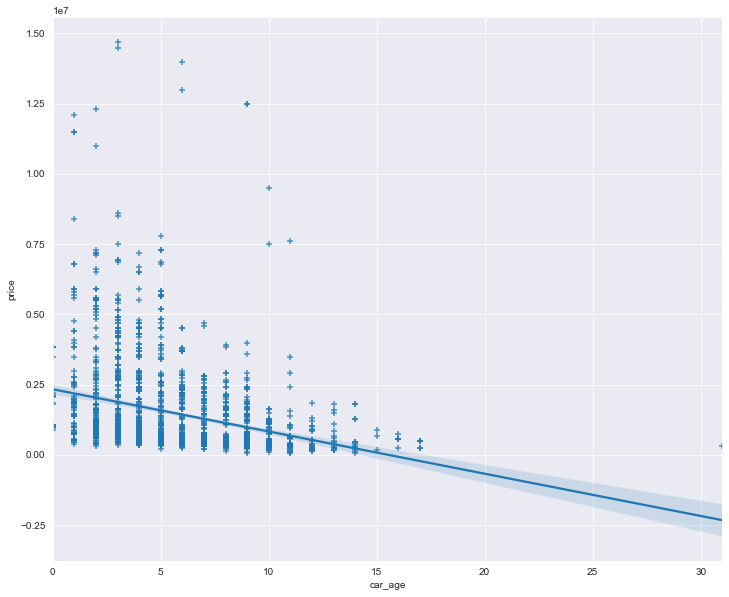

In [30]:
# Car Age and Price Feature Relationship 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(data = cars_df, x='car_age', y='price', marker="+")
plt.xlabel('car_age')
plt.ylabel('price')
plt.show()

In [31]:
cars_df[["car_age", "price"]].corr()

,car_age,price
car_age,1.000000,-0.288483
price,-0.288483,1.000000


* weak `-ve` correlationship b/w price & car_age

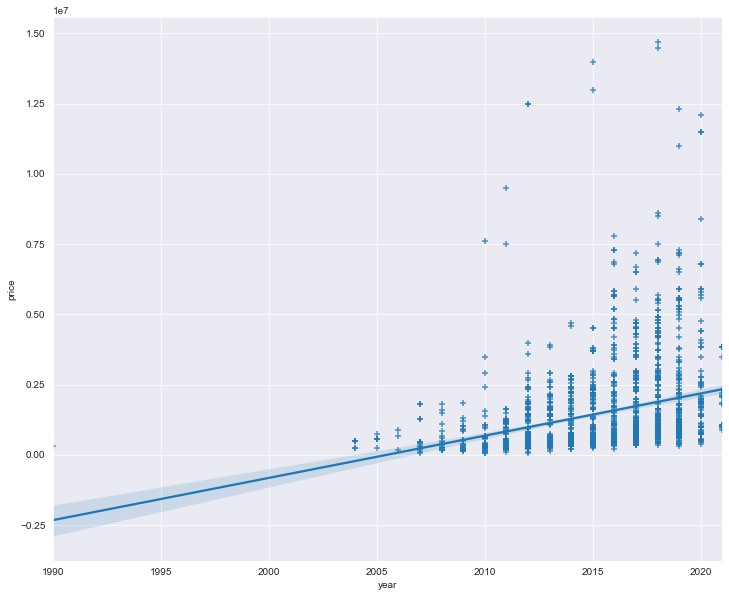

In [32]:
# and Price Feature Relationship 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(data = cars_df, x='year', y='price', marker="+")
plt.xlabel('year')
plt.ylabel('price')
plt.show()

In [33]:
cars_df[["year", "price"]].corr()

,year,price
year,1.000000,0.288483
price,0.288483,1.000000


* weak `+ve` correlation b/w year & price

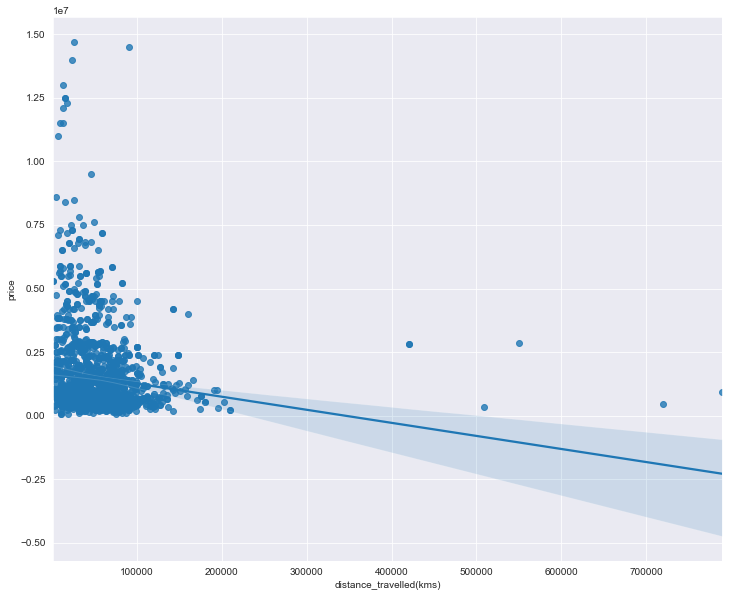

In [34]:
# distance_travelled(kms) and Price Feature Relationship 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(data = cars_df, x='distance_travelled(kms)', y='price')
plt.xlabel('distance_travelled(kms)')
plt.ylabel('price')
plt.show()

In [35]:
cars_df[["distance_travelled(kms)", "price"]].corr()

,distance_travelled(kms),price
distance_travelled(kms),1.000000,-0.137351
price,-0.137351,1.000000


* seems weak linear `-ve` correlation b/w year & price

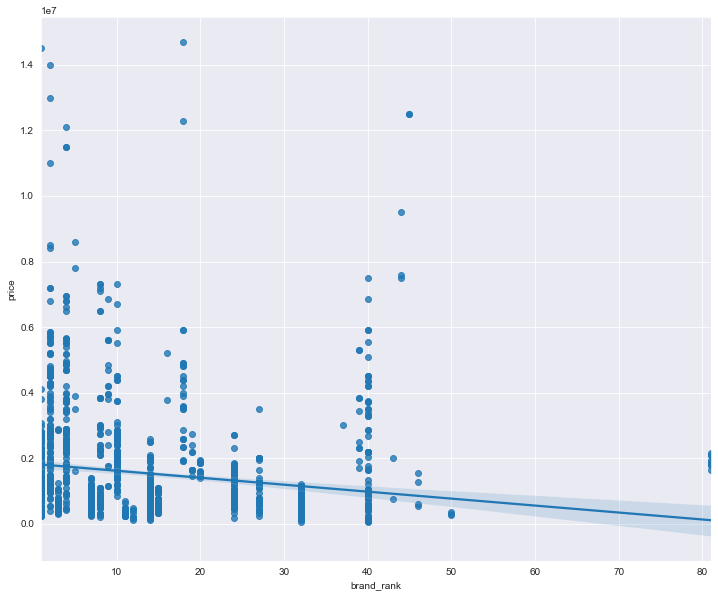

In [36]:
# brand_rank and Price Feature Relationship 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(data = cars_df, x='brand_rank', y='price')
plt.xlabel('brand_rank')
plt.ylabel('price')
plt.show()

In [37]:
cars_df[["brand_rank", "price"]].corr()

,brand_rank,price
brand_rank,1.000000,-0.164591
price,-0.164591,1.000000


* seems weak +ve correlation b/w year & price

<h2>Categorical Variables</h2>

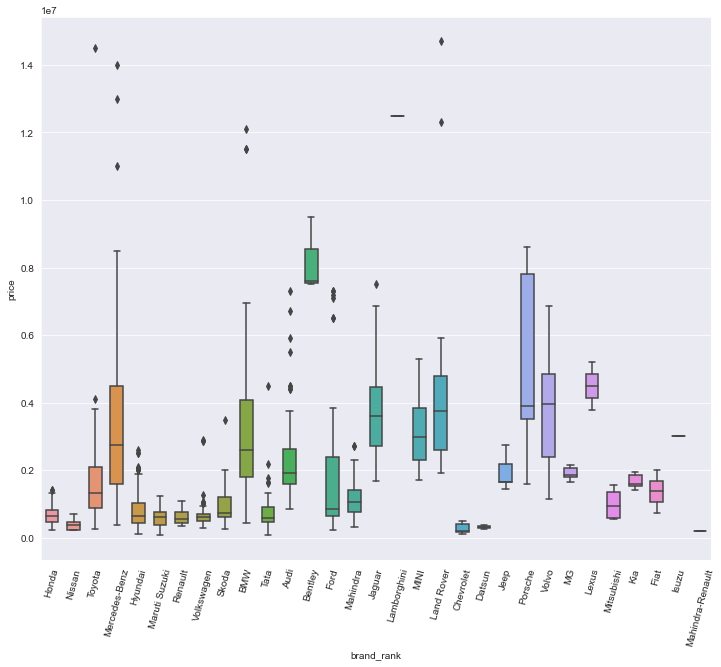

In [38]:
width = 12
height = 10
plt.figure(figsize=(width, height))
ax = sns.boxplot(x="brand", y="price", data=cars_df, width = 0.6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=75)
plt.xlabel('brand_rank')
plt.ylabel('price')
plt.show()

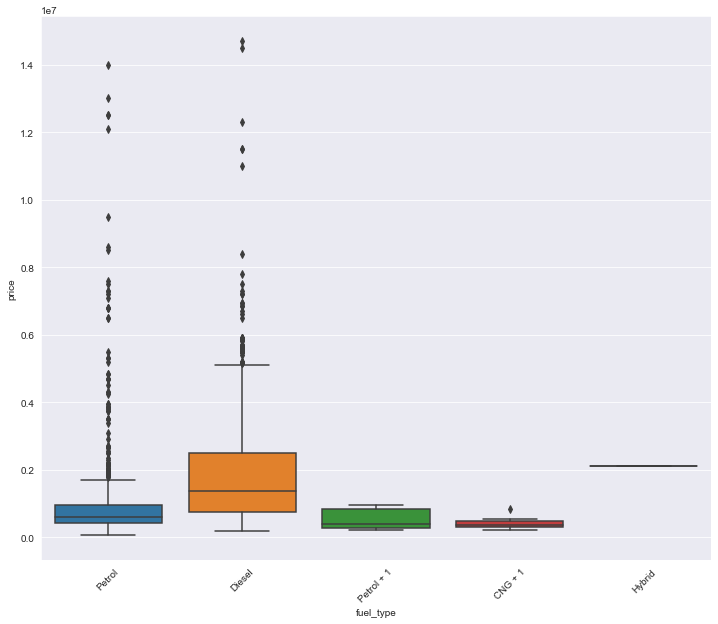

In [39]:
width = 12
height = 10
plt.figure(figsize=(width, height))
ax = sns.boxplot(x="fuel_type", y="price", data=cars_df,width = 0.8)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.xlabel('fuel_type')
plt.ylabel('price')
plt.show()

* We can see here that the is not much overlapped b/w the categories so this could be the good candidadte to determine the price of used cars however we could see there are few outliers is present.

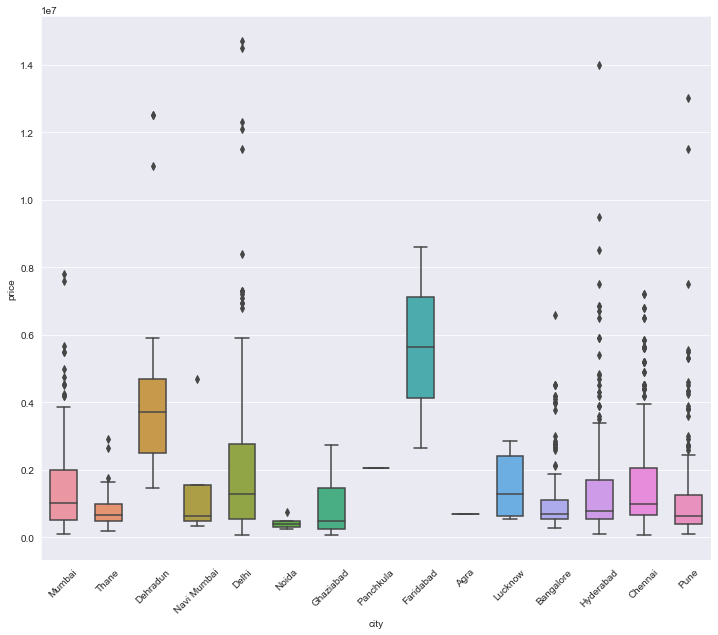

In [40]:
width = 12
height = 10
plt.figure(figsize=(width, height))
ax=sns.boxplot(x="city", y="price", data=cars_df, width=0.6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.xlabel('city')
plt.ylabel('price')
plt.show()

 <h2>Descriptive Statistical Analysis</h2>

In [41]:
cars_df.describe()

,Id,year,price,distance_travelled(kms),brand_rank,car_age
count,1725.000000,1725.000000,1.725000e+03,1725.000000,1725.000000,1725.000000
mean,862.000000,2015.390725,1.494837e+06,53848.256232,15.731014,5.609275
std,498.108924,3.207504,1.671658e+06,44725.541963,12.951122,3.207504
min,0.000000,1990.000000,6.250000e+04,350.000000,1.000000,0.000000
25%,431.000000,2013.000000,5.450000e+05,29000.000000,5.000000,3.000000
50%,862.000000,2016.000000,8.750000e+05,49000.000000,14.000000,5.000000
75%,1293.000000,2018.000000,1.825000e+06,70500.000000,24.000000,8.000000
max,1724.000000,2021.000000,1.470000e+07,790000.000000,81.000000,31.000000


<h2> Basics of Grouping </h2>

* The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

In [42]:
cars_df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Petrol + 1', 'CNG + 1', 'Hybrid'],
      dtype=object)

In [43]:
df_group_one = cars_df[['fuel_type', 'brand', 'city', 'price']]

In [44]:
gp = df_group_one.groupby(['fuel_type'],as_index=False)
gp.head()

,fuel_type,brand,city,price
0,Petrol,Honda,Mumbai,425000.0
1,Diesel,Nissan,Mumbai,325000.0
2,Diesel,Toyota,Thane,2650000.0
3,Diesel,Mercedes-Benz,Mumbai,4195000.0
4,Diesel,Hyundai,Mumbai,475000.0
5,Petrol,Hyundai,Mumbai,335000.0
6,Petrol,Toyota,Mumbai,750000.0
7,Diesel,Mercedes-Benz,Mumbai,5500000.0
8,Petrol,Hyundai,Mumbai,565000.0
9,Petrol,Maruti Suzuki,Mumbai,510000.0


In [45]:
gp.mean()

,fuel_type,price
0,CNG + 1,4.218750e+05
1,Diesel,1.914885e+06
2,Hybrid,2.100000e+06
3,Petrol,1.020832e+06
4,Petrol + 1,5.300000e+05


* You can also group by multiple variables. 

In [46]:
# grouping results
df_gptest = cars_df[['fuel_type', 'brand', 'city', 'price']]
grouped_test1 = df_gptest.groupby(['fuel_type','brand'],as_index=False).mean()
grouped_test1

,fuel_type,brand,price
0,CNG + 1,Maruti Suzuki,4.218750e+05
1,Diesel,Audi,2.297151e+06
2,Diesel,BMW,3.161100e+06
3,Diesel,Chevrolet,3.725000e+05
4,Diesel,Fiat,7.400000e+05
...,...,...,...
56,Petrol,Volvo,3.950000e+06
57,Petrol + 1,Hyundai,2.250000e+05
58,Petrol + 1,Maruti Suzuki,7.200000e+05
59,Petrol + 1,Renault,4.700000e+05


In [47]:
grouped_pivot = grouped_test1.pivot(index='fuel_type',columns='brand')
grouped_pivot

price                                               \
brand               Audi           BMW    Bentley Chevrolet    Datsun   
fuel_type                                                               
CNG + 1              NaN           NaN        NaN       NaN       NaN   
Diesel      2.297151e+06  3.161100e+06        NaN  372500.0       NaN   
Hybrid               NaN           NaN        NaN       NaN       NaN   
Petrol      1.314800e+06  3.588762e+06  8200000.0  201400.0  310000.0   
Petrol + 1           NaN           NaN        NaN       NaN       NaN   

                                                                              \
brand            Fiat          Ford          Honda        Hyundai      Isuzu   
fuel_type                                                                      
CNG + 1           NaN           NaN            NaN            NaN        NaN   
Diesel       740000.0  1.539722e+06  752424.242424  924566.265060  3000000.0   
Hybrid            NaN           NaN            NaN            NaN        NaN   
Petrol      2000000.0  2.198542e+06  632616.666667  696399.061033        NaN   
Petrol + 1        NaN           NaN            NaN  225000.000000        NaN   

            ...                                                        \
brand       ... Mercedes-Benz Mitsubishi         Nissan       Porsche   
fuel_type   ...                                                         
CNG + 1     ...           NaN        NaN            NaN           NaN   
Diesel      ...  3.321465e+06  1412500.0  325000.000000  5.850000e+06   
Hybrid      ...           NaN        NaN            NaN           NaN   
Petrol      ...  3.148867e+06   572500.0  395833.333333  4.566667e+06   
Petrol + 1  ...           NaN        NaN            NaN           NaN   

                                                                       \
brand             Renault          Skoda           Tata        Toyota   
fuel_type                                                               
CNG + 1               NaN            NaN            NaN           NaN   
Diesel      728923.076923  991000.000000  998363.636364  1.769979e+06   
Hybrid                NaN            NaN            NaN           NaN   
Petrol      526875.000000  970588.235294  610454.545455  9.714545e+05   
Petrol + 1  470000.000000            NaN            NaN  3.250000e+05   

                                      
brand          Volkswagen      Volvo  
fuel_type                             
CNG + 1               NaN        NaN  
Diesel      850740.740741  3760000.0  
Hybrid                NaN        NaN  
Petrol      626302.325581  3950000.0  
Petrol + 1            NaN        NaN  

[5 rows x 31 columns]

<h2> Correlation and Causation </h2>

In [48]:
cars_df.corr()

,Id,year,price,distance_travelled(kms),brand_rank,car_age
Id,1.000000,-0.054391,-0.105696,0.100282,0.022191,0.054391
year,-0.054391,1.000000,0.288483,-0.386107,0.134275,-1.000000
price,-0.105696,0.288483,1.000000,-0.137351,-0.164591,-0.288483
distance_travelled(kms),0.100282,-0.386107,-0.137351,1.000000,-0.111406,0.386107
brand_rank,0.022191,0.134275,-0.164591,-0.111406,1.000000,-0.134275
car_age,0.054391,-1.000000,-0.288483,0.386107,-0.134275,1.000000


* Now we would like to know the significant of the correlation estimate.

In [49]:
from scipy import stats

In [50]:
pearson_coef, p_value = stats.pearsonr(cars_df['year'], cars_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.28848307091372793  with a P-value of P = 2.047766066480015e-34


In [51]:
pearson_coef, p_value = stats.pearsonr(cars_df['distance_travelled(kms)'], cars_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.1373512313891423  with a P-value of P = 1.0182841034396052e-08


In [52]:
pearson_coef, p_value = stats.pearsonr(cars_df['brand_rank'], cars_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.16459075697370953  with a P-value of P = 6.071174786508284e-12


In [53]:
pearson_coef, p_value = stats.pearsonr(cars_df['car_age'], cars_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.2884830709137278  with a P-value of P = 2.0477660664797823e-34


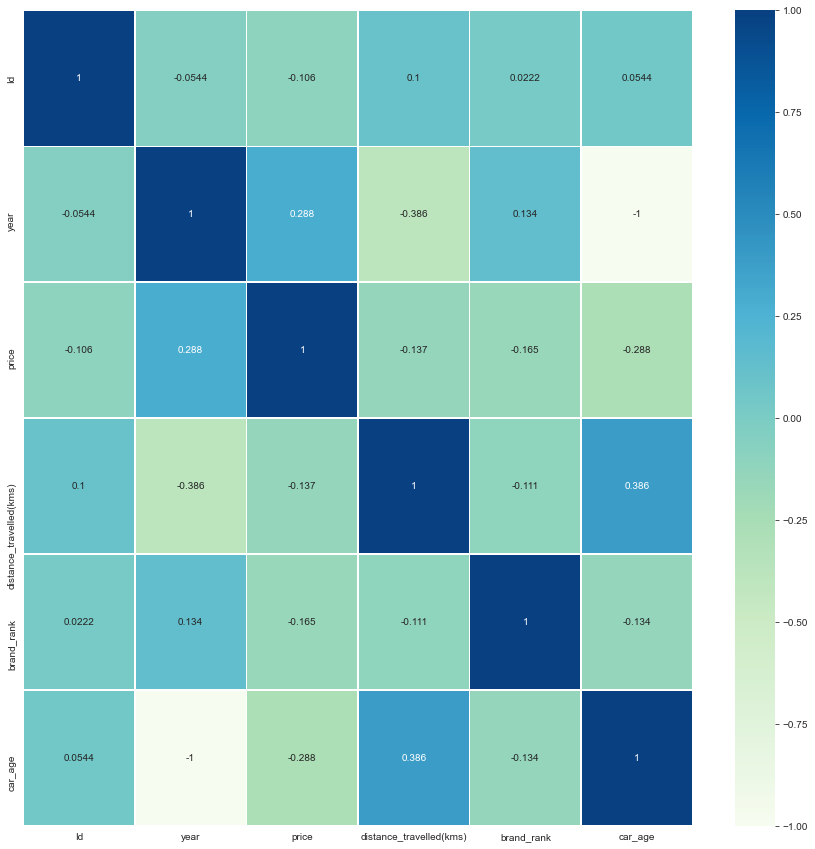

In [54]:
plt.figure(figsize=(15, 15))
corr = cars_df.corr()
sns.heatmap(corr, annot=True,cmap='GnBu', fmt='.3g',linewidth=.5)
plt.show()

<h2> ANOVA (Analysis of variance) </h2>

* We can perform the one way anova and two way anova as well here to perform the few hypohesis testing.

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.